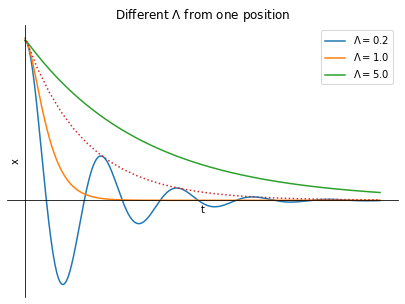

In [1]:
from scipy.integrate import odeint
import numpy as np
from matplotlib import pyplot as plt

b_vec = np.array([0.2, 1.0, 5.0])
w0_vec = np.array([1. for i in range(len(b_vec))])
def deri(xvec, time, b, w0):
    dx = xvec[1]
    d2x = -2*b*xvec[1]-w0**2*xvec[0]
    return dx, d2x

xinit = (1, 0)
time_vec = np.linspace(0, 30, 1000)

##### Solution and Plot
plt.figure(1, figsize=(7,5))
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

for i in range(len(b_vec)):
    xarr = odeint(deri, xinit, time_vec, args=(b_vec[i], w0_vec[i]))
    plt.plot(time_vec, xarr[:,0], label=r'$\Lambda='+str(b_vec[i])+'$')

t1 = np.linspace(0, 30, 30)
plt.plot(t1, np.exp(-b_vec[0]*t1)*(1+(b_vec[0]/w0_vec[0])**2)**0.5,':')
plt.yticks([])
plt.xticks([])
plt.xlabel('t')
plt.ylabel('x')
plt.legend()

plt.title(r'Different $\Lambda$ from one position')
plt.show()

## Phase Diagram

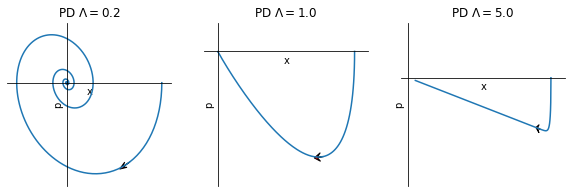

In [2]:
plt.figure(2, figsize=(10, 3))
wid_vec = np.array([0.05, 0.03, 0.015])

for i in range(len(b_vec)):
    plt.subplot(1, len(b_vec), i+1)
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    xarr = odeint(deri, xinit, time_vec, args=(b_vec[i], w0_vec[i]))
    plt.plot(xarr[:,0],xarr[:,1])
    plt.title(r'PD $\Lambda='+str(b_vec[i])+'$')
    ax.arrow(xarr[30, 0], xarr[30, 1], xarr[32, 0]-xarr[30, 0], xarr[32, 1]-xarr[30, 1], fc='r', overhang=0.5, head_width = wid_vec[i])
    plt.xlim(np.min(xarr[:,0])-0.1, np.max(xarr[:,0])+0.1)
    plt.ylim(np.min(xarr[:,1])-0.1, np.max(xarr[:,1])+0.1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel('x')
    plt.ylabel('p')

plt.show()